# IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
data = pd.read_csv("Medical_Cost.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
# Now convert the integer part to numerical as our machine learing model only deal with numerical values
data['sex'] = data['sex'].map({'male':1, 'female':0})
data['smoker'] = data['smoker'].map({'yes':1, 'no':0})
data['region'] = data['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [8]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,4,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [9]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,2.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,2.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


In [10]:
data_correlation = data.corr()

In [11]:
data_correlation

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


<AxesSubplot:>

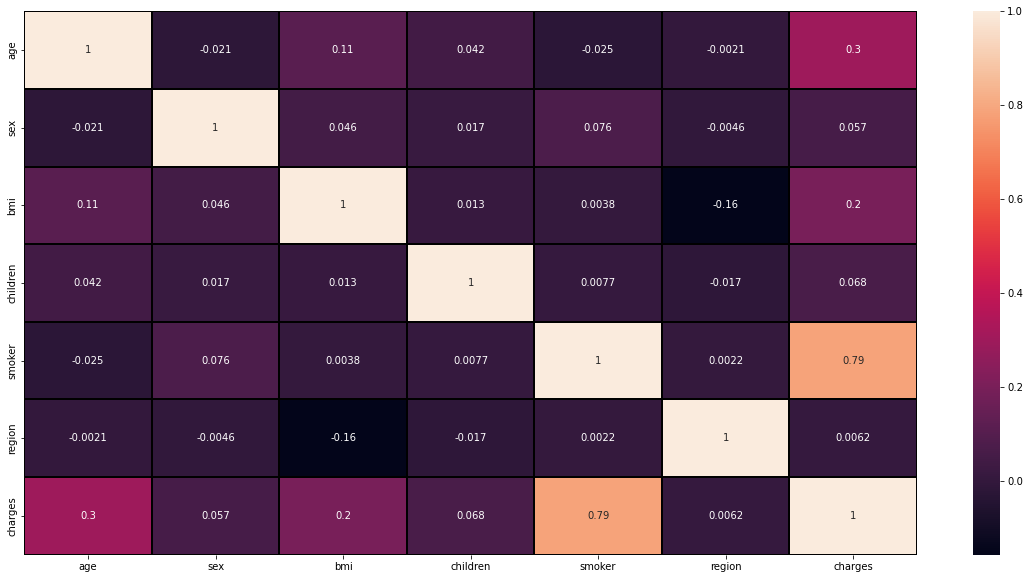

In [12]:
plt.figure(figsize = (20, 10))
sns.heatmap(data = data_correlation, annot = True, linewidth = 0.20, linecolor = 'black')

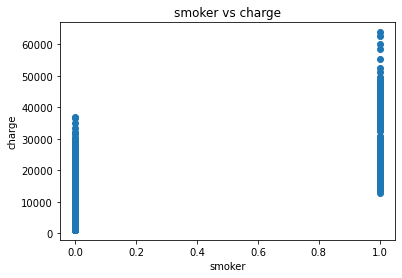

In [13]:
# it seems like smoker and charges are little correlated lets check with scatter plot

plt.scatter(data.smoker, data.charges)
plt.xlabel('smoker')
plt.ylabel('charge')
plt.title('smoker vs charge')
plt.show()

<AxesSubplot:xlabel='sex', ylabel='count'>

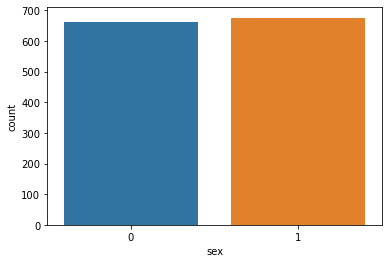

In [14]:
sns.countplot(data['sex'])

In [15]:
data['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

<AxesSubplot:xlabel='children', ylabel='count'>

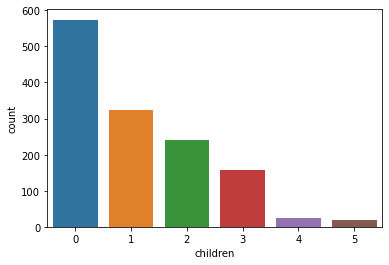

In [16]:
sns.countplot(data['children'])

In [17]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

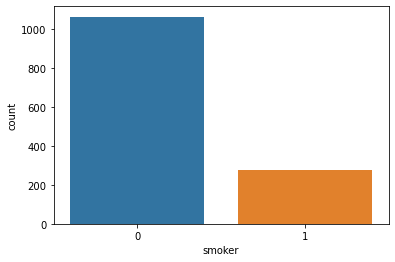

In [18]:
sns.countplot(data['smoker'])

In [19]:
data['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

2    364
1    325
3    325
4    324
Name: region, dtype: int64


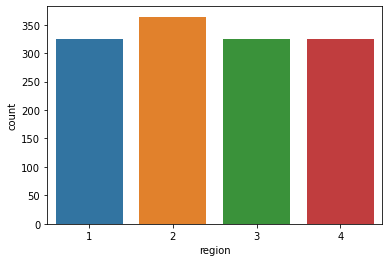

In [20]:
sns.countplot(data['region']) 
print(data['region'].value_counts())

Text(0.5, 1.0, ' BMI distribution plot')

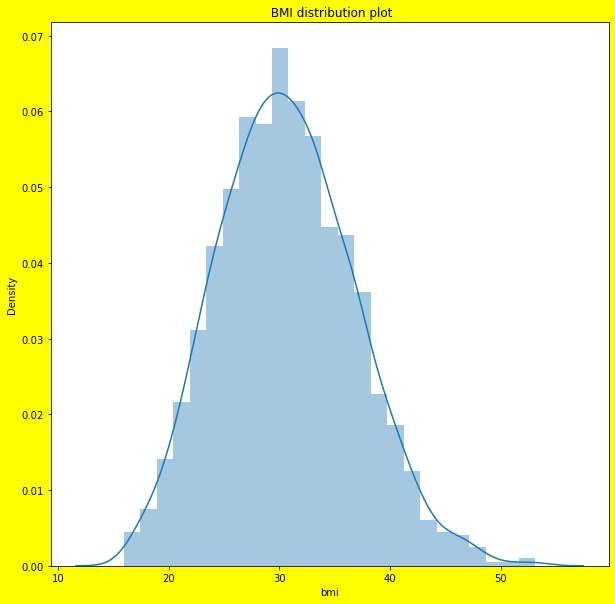

In [21]:
#Normal distribution plot for BMI and age
sns.set
plt.figure(figsize = (10,10), facecolor = 'yellow')
sns.distplot(data['bmi']) 
plt.title(' BMI distribution plot')

Text(0.5, 1.0, ' AGE distribution plot')

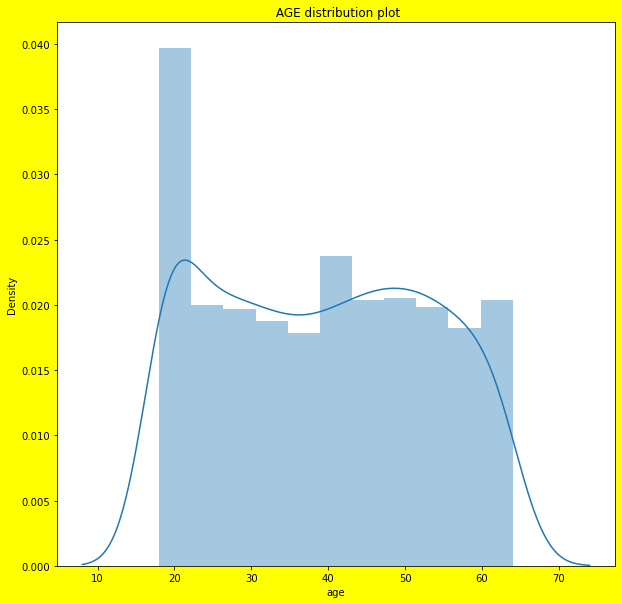

In [22]:
plt.figure(figsize = (10,10), facecolor = 'yellow')
sns.distplot(data['age']) 
plt.title(' AGE distribution plot')

Text(0.5, 1.0, ' CHARGE distribution plot')

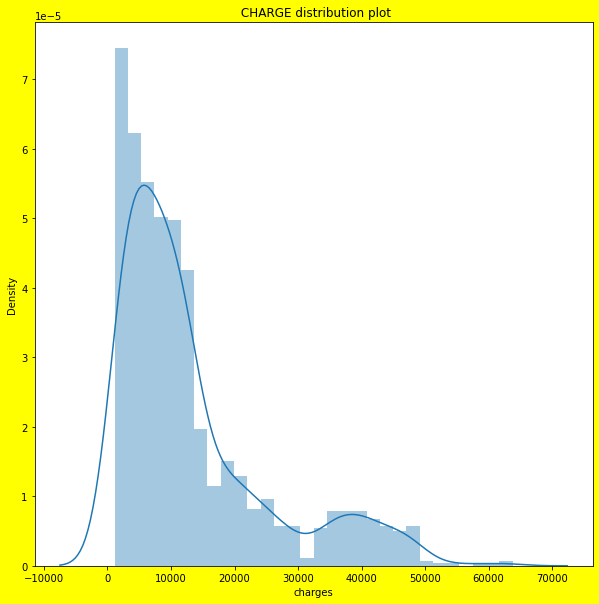

In [23]:
plt.figure(figsize = (10,10), facecolor = 'yellow')
sns.distplot(data['charges']) 
plt.title(' CHARGE distribution plot')

In [24]:
# SPLITTING THE FEATURE AND TARGET 

x = data.drop(columns = 'charges', axis = 1)
y = data.charges

In [25]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,0,31.920,0,0,4
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,1


In [26]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [27]:
# splitting into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 509)

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics


# LINEAR REGRESSION MODEL

In [43]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [44]:
y_pred_train = lr.predict(x_train)
y_pred_train

array([40290.39273149, 11528.91272381, 34084.05444491, ...,
       13061.26641302,  8417.62880834, 37723.02643349])

In [45]:
accuracy = metrics.r2_score(y_train, y_pred)
print('R square score', accuracy)

R square score 0.7545777288630052


In [46]:
# Now predicting on test data
y_pred_test = lr.predict(x_test)
y_pred_test

array([12918.59309265,  2210.52065098, 11668.52218294, 14466.98994451,
        5135.27587412,  2360.8349518 , 37396.75309342,  6900.5882283 ,
       15200.61374176, 15608.24983557, 11407.61052134, 36166.31685692,
       33961.6016796 ,  9044.07503038, 29445.21094659, 31947.00498823,
        8255.94565492,  9196.49930401,   899.65302237,  8671.03514407,
        4405.71915254,  5108.80316614,  3767.75855273, 11828.25838892,
       32044.18037514, 11285.54433151,  6647.24908066, 32480.63470578,
        2539.24499064, 37244.0651384 , 14994.60139565, 15772.98630194,
        5051.68944636, 24365.31888903,  4960.51451152,  3131.46767536,
        4897.02068886, 16006.30833991, 10018.37660228, 14586.32025268,
       12216.17337482, 34893.59150194, 13576.41405114, 31319.88277862,
        9712.81521505,  7831.57280512, 13254.16950597,  2471.0402154 ,
       13130.5956567 ,  1985.00475623, 11930.64766617,  4647.08888045,
       11036.53333644,  2697.45913658, 26523.27233683, 28945.54147597,
      

In [47]:
accuracy_test = metrics.r2_score(y_test, y_pred_test)
print('R square score on test data', accuracy_test)

R square score on test data 0.737488870470441


# support vector regression

In [48]:
sv = SVR()
sv.fit(x_train, y_train)

SVR()

In [49]:
y_pred_sv_train = sv.predict(x_train)
y_pred_sv_train

array([9318.09005803, 9290.35711413, 9246.72415995, ..., 9203.26263324,
       9163.01835077, 9328.38015824])

In [50]:
accuracy_sv_train = metrics.r2_score(y_train, y_pred_sv_train)
print('R square score', accuracy)

R square score 0.7545777288630052


In [51]:
# Now predicting on test data
y_pred_sv_test = lr.predict(x_test)
y_pred_sv_test

array([12918.59309265,  2210.52065098, 11668.52218294, 14466.98994451,
        5135.27587412,  2360.8349518 , 37396.75309342,  6900.5882283 ,
       15200.61374176, 15608.24983557, 11407.61052134, 36166.31685692,
       33961.6016796 ,  9044.07503038, 29445.21094659, 31947.00498823,
        8255.94565492,  9196.49930401,   899.65302237,  8671.03514407,
        4405.71915254,  5108.80316614,  3767.75855273, 11828.25838892,
       32044.18037514, 11285.54433151,  6647.24908066, 32480.63470578,
        2539.24499064, 37244.0651384 , 14994.60139565, 15772.98630194,
        5051.68944636, 24365.31888903,  4960.51451152,  3131.46767536,
        4897.02068886, 16006.30833991, 10018.37660228, 14586.32025268,
       12216.17337482, 34893.59150194, 13576.41405114, 31319.88277862,
        9712.81521505,  7831.57280512, 13254.16950597,  2471.0402154 ,
       13130.5956567 ,  1985.00475623, 11930.64766617,  4647.08888045,
       11036.53333644,  2697.45913658, 26523.27233683, 28945.54147597,
      

In [52]:
accuracy_sv_test = metrics.r2_score(y_test, y_pred_sv_test)
print('R square score on test data', accuracy_sv_test)

R square score on test data 0.737488870470441


# RANDOM FOREST REGRESSOR

In [70]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)
accuracy_rf_train = metrics.r2_score(y_train, y_pred_rf_train)
accuracy_rf_test = metrics.r2_score(y_test, y_pred_rf_test)


In [71]:
print('R square score on train data', accuracy_rf_train)
print('R square score on test data', accuracy_rf_test)


R square score on train data 0.9761618911980254
R square score on test data 0.835854533521941


# GRADIENT BOOSTING REGRESSOR

In [74]:
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [75]:
y_pred_gb_train = gb.predict(x_train)
y_pred_gb_test = gb.predict(x_test)
accuracy_gb_train = metrics.r2_score(y_train, y_pred_gb_train)
accuracy_gb_test = metrics.r2_score(y_test, y_pred_gb_test)

In [76]:
print('R square score on train data', accuracy_gb_train)
print('R square score on test data', accuracy_gb_test)

R square score on train data 0.9050322788967319
R square score on test data 0.8596135599350522


# ADDA BOOST REGRESSOR

In [82]:
from sklearn.ensemble import AdaBoostRegressor

In [84]:
ab = AdaBoostRegressor()
ab.fit(x_train, y_train)

AdaBoostRegressor()

In [85]:
y_pred_ab_train = ab.predict(x_train)
y_pred_ab_test = ab.predict(x_test)
accuracy_ab_train = metrics.r2_score(y_train, y_pred_ab_train)
accuracy_ab_test = metrics.r2_score(y_test, y_pred_ab_test)

In [86]:
print('R square score on train data', accuracy_ab_train)
print('R square score on test data', accuracy_ab_test)

R square score on train data 0.8353495198108161
R square score on test data 0.8313021039572461


# XGBOOST REGRESSOR

In [167]:
import xgboost as xgb

In [168]:
xgb = xgb.XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [169]:
y_pred_xgb_train = xgb.predict(x_train)
y_pred_xgb_test = xgb.predict(x_test)
accuracy_xgb_train = metrics.r2_score(y_train, y_pred_xgb_train)
accuracy_xgb_test = metrics.r2_score(y_test, y_pred_xgb_test)

In [170]:
print('R square score on train data', accuracy_xgb_train)
print('R square score on test data', accuracy_xgb_test)

R square score on train data 0.9953757684450911
R square score on test data 0.8174230521712191


# HYPERPARAMETER TUNING USING RANDOMIZED SEARCH CV(Ada booost & Gradient boost)

In [100]:
from sklearn.model_selection import RandomizedSearchCV

In [101]:
params = {'n_estimators':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'learning_rate':[0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.70, 0.75]}

In [105]:
rnd_srch = RandomizedSearchCV(GradientBoostingRegressor(), cv = 5, param_distributions = params)

In [106]:
rnd_srch.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.35, 0.4,
                                                          0.45, 0.5, 0.55, 0.6,
                                                          0.7, 0.75],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100,
                                                         110]})

In [107]:
rnd_srch.best_estimator_

GradientBoostingRegressor(learning_rate=0.5, n_estimators=20)

In [ ]:
# Now lets train and predict after using hyperparameter  tuning (Gradient Boosting classifier)

In [159]:
gb2 = GradientBoostingRegressor(learning_rate = 0.20, n_estimators = 20)
gb2.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, n_estimators=20)

In [160]:
y_pred_gb2_train = gb2.predict(x_train)
y_pred_gb2_test = gb2.predict(x_test)
accuracy_gb2_train = metrics.r2_score(y_train, y_pred_gb2_train)
accuracy_gb2_test = metrics.r2_score(y_test, y_pred_gb2_test)

In [161]:
print('R square score on train data', accuracy_gb_train)
print('R square score on test data', accuracy_gb_test)
print('R square score on train data after hyperparameter tuning', accuracy_gb2_train)
print('R square score on test data after hyperparameter tuning', accuracy_gb2_test)

R square score on train data 0.9050322788967319
R square score on test data 0.8596135599350522
R square score on train data after hyperparameter tuning 0.8824889177204037
R square score on test data after hyperparameter tuning 0.85989034164975


In [112]:
rnd_srch = RandomizedSearchCV(AdaBoostRegressor(), cv = 5, param_distributions = params)

In [113]:
rnd_srch.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.35, 0.4,
                                                          0.45, 0.5, 0.55, 0.6,
                                                          0.7, 0.75],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100,
                                                         110]})

In [114]:
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.3, n_estimators=10)

In [ ]:
# Now lets train and predict after using hyperparameter  tuning (Adda Boost classifier)

In [174]:
ab2 = AdaBoostRegressor(learning_rate = 0.2, n_estimators = 20)
ab2.fit(x_train, y_train)

AdaBoostRegressor(learning_rate=0.2, n_estimators=20)

In [175]:
y_pred_ab2_train = ab2.predict(x_train)
y_pred_ab2_test = ab2.predict(x_test)
accuracy_ab2_train = metrics.r2_score(y_train, y_pred_ab2_train)
accuracy_ab2_test = metrics.r2_score(y_test, y_pred_ab2_test)

In [176]:
print('R square score on train data', accuracy_ab_train)
print('R square score on test data', accuracy_ab_test)
print('R square score on train data after hyperparameter tuning', accuracy_ab2_train)
print('R square score on test data after hyperparameter tuning', accuracy_ab2_test)

R square score on train data 0.8353495198108161
R square score on test data 0.8313021039572461
R square score on train data after hyperparameter tuning 0.8476380000555618
R square score on test data after hyperparameter tuning 0.8387689499114599


# PREDICT CHARGES FOR NEW DATA USING GRADIENT BOSSTING CLASSIFIER

In [181]:
new_data = {'age': 50, 'sex':0, 'bmi': 41.74, 'children':2, 'smoker':1, 'region':1}

In [183]:
n_df = pd.DataFrame(new_data, index = [0])

In [184]:
n_df

,age,sex,bmi,children,smoker,region
0,50,0,41.74,2,1,1


In [185]:
my_prediction = gb2.predict(n_df)
print(my_prediction)

[43428.80374595]


# SAVE OUR MODEL

In [192]:
gb2 = GradientBoostingRegressor(learning_rate = 0.20, n_estimators = 20)
gb2.fit(x, y)

GradientBoostingRegressor(learning_rate=0.2, n_estimators=20)

In [193]:
import joblib

In [194]:
joblib.dump(gb2, "model_name")

['model_name']

In [195]:
model = joblib.load('model_name')

In [196]:
model.predict(n_df)

array([44165.50751286])